# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 2 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

# <center> Procesamiento del Lenguaje Natural <center/> 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

In [68]:
#Import dataframe
ds_propiedades = pd.read_csv('./ds_propiedades_total_clasificado.csv')
ds_descripciones = pd.read_csv('./properati_argentina_2021_decrip.csv')
ds_propiedades.head()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,Venta: Hermoso piso de categoría en excelente ...,2875.000000,alto
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,Departamento - Colegiales,2960.000000,alto
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,Departamento en venta tres ambientes- Almagro,1893.617021,medio
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,Departamento - Belgrano,2442.307692,medio
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,Lindísimo departamento antiguo en excelente es...,1709.210526,bajo


In [69]:
#filter ds_descripciones by id in ds_propiedades
ds_descripciones = ds_descripciones[ds_descripciones['id'].isin(ds_propiedades['id'])]
ds_descripciones.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
10,+9uGr8tPEUkKnpjOef+gUw==,SE VENDE EXCELENTE PH de 2 CÓMODOS AMBIENTES M...
11,uH5H+RfQM87Qtrb13+T4hA==,"Venta PH 4 ambientes Paternal<br><br>Cálido, ..."


## Exportamos el dataframe a un archivo de texto para poder pasarlo por ECmes

In [70]:
ds_descripciones_sin_id = ds_descripciones.drop(['id'], axis=1)

ds_descripciones_sin_id.to_csv('ds_descripciones.txt', index=False)

In [71]:
ds_descripciones

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
10,+9uGr8tPEUkKnpjOef+gUw==,SE VENDE EXCELENTE PH de 2 CÓMODOS AMBIENTES M...
11,uH5H+RfQM87Qtrb13+T4hA==,"Venta PH 4 ambientes Paternal<br><br>Cálido, ..."
...,...,...
460087,KfWSMnexlkmkhAXueyCVDA==,RETASADO <br>Pareja 3235 edificio doble frente...
460088,3c+iy2dwumPHHcOU7EkwDg==,Corredor Responsable: Ariel Champanier / Andre...
460089,IIRjcdqGjta3WIi6xRu6uA==,Excelente PH en dos plantas sin expensas al c...
460125,z6IALPHlnIdXzLsoM2bKJQ==,*** AV. JUAN B JUSTO entre SÁNCHEZ y TRELLES *...


In [72]:
ds_propiedades.shape

(85693, 13)

In [73]:
print(ds_descripciones[ds_descripciones['id'] == 'F5IvmD1uzzdIR7b96ozt4g==']['property_description'].to_string(index=False))

Hermoso piso de 4 ambientes con dependencia y c...


## Limpiamos el archivo de descripciones para que lo pueda leer Ecmes correctamente.

In [74]:
dic_replace = {

    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U',
    'ñ': 'ni',
    'Ñ': 'NI',
    'ü': 'u',
    'Ü': 'U',
    '<br>': ' ',
    '<br />': ' ',
    '<br/>': ' ',
    '<p>': ' ',
    '</p>': ' ',
    '<b>': ' ',
    '</b>': ' ',
    
 
}

In [75]:
# #for every line in ds_descripciones.txt replace the '(' and ')' with ',' and save it in ds_descripciones.txt line by line 
# with open('ds_descripciones.txt', 'r', encoding = 'utf8') as f_in, open('ds_descripciones_out.txt', 'w', encoding = 'utf8') as f_out:
#     for line in f_in:
#         for src, target in dic_replace.items():
#             line = line.replace(src, target)
        
       
#         #leave only alpha characters in the line, also spaces and line jumps
#         line = ''.join([c for c in line if c.isalpha() or c == ' ' or c == '\n' or c == '.' or c == ','])
 
        
   

#         # for src, target in dic_replace.items():
#         #     line = line.replace(src, target)
#         f_out.writelines(line)


    



In [76]:
#join the two dataframes by id
ds_propiedades = ds_propiedades.join(ds_descripciones.set_index('id'), on='id')
ds_propiedades.head()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,property_description
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,Venta: Hermoso piso de categoría en excelente ...,2875.000000,alto,Hermoso piso de 4 ambientes con dependencia y ...
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,Departamento - Colegiales,2960.000000,alto,2 ambientes con balcón y vista totalmente abie...
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,Departamento en venta tres ambientes- Almagro,1893.617021,medio,**DIAZ VELEZ 4291 Y PRINGLES** Almagro.<br><br...
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,Departamento - Belgrano,2442.307692,medio,IMPECABLE 2 AMBIENTES A ESTRENAR!<...
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,Lindísimo departamento antiguo en excelente es...,1709.210526,bajo,"Excelente piso antiguo, lindísimo por sus tech..."


## Imputacion de nuevos parametros basados en los datos de Ecmes

#### pileta

In [77]:
#add column piscina to ds_propiedades with 0 or 1 if the property has a pool or not based on property_description (piscina or pileta)
import re 
regexp = re.compile(r'piscina|pileta/gi', re.IGNORECASE)

ds_propiedades['piscina'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)


In [78]:
#cantidad de propiedades con piscina
ds_propiedades[ds_propiedades['piscina'] == 1].shape

(9729, 15)

#### garaje

In [79]:
regexp  = re.compile(r'cochera|garage/gi', re.IGNORECASE)

ds_propiedades['cochera'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [80]:
#cantidad de propiedades con cochera
ds_propiedades[ds_propiedades['cochera'] == 1].shape

(27031, 16)

#### balcon

In [81]:
regexp  = re.compile(r'balc[oó]n|/gi', re.IGNORECASE)

ds_propiedades['balcon'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [82]:
#cantidad de propiedades con balcon
ds_propiedades[ds_propiedades['balcon'] == 1].shape

(52839, 17)

#### hidromasaje

In [83]:
regexp  = re.compile(r'hidromasaje|jacuzzi|spa/gi', re.IGNORECASE)

ds_propiedades['hidromasaje'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [84]:
#cantidad de propiedades con hidromasaje
ds_propiedades[ds_propiedades['hidromasaje'] == 1].shape

(4047, 18)

#### jardín

In [85]:
regexp = re.compile(r'jardin|jardín/gi', re.IGNORECASE)

ds_propiedades['jardin'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [86]:
#cantidad de propiedades con jardin
ds_propiedades[ds_propiedades['jardin'] == 1].shape

(2688, 19)

#### gimnasio

In [87]:
regexp = re.compile(r'gimnasio|gym/gi', re.IGNORECASE)

ds_propiedades['gimnasio'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [88]:
#cantidad de propiedades con gimnasio
ds_propiedades[ds_propiedades['gimnasio'] == 1].shape

(6601, 20)

#### a estrenar

In [89]:
regexp = re.compile(r'estrenar|/gi', re.IGNORECASE)

ds_propiedades['a_estrenar'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [90]:
#cantidad de propiedades a estrenar
ds_propiedades[ds_propiedades['a_estrenar'] == 1].shape

(8311, 21)

#### sótano

In [91]:
regexp = re.compile(r'sotano|sótano/gi', re.IGNORECASE)

ds_propiedades['sotano'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [92]:
#cantidad de propiedades con sotano
ds_propiedades[ds_propiedades['sotano'] == 1].shape

(83, 22)

#### quincho

In [93]:
regexp = re.compile(r'quincho|/gi', re.IGNORECASE)

ds_propiedades['quincho'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [94]:
#cantidad de propiedades con quincho
ds_propiedades[ds_propiedades['quincho'] == 1].shape

(3173, 23)

#### sum

In [95]:
regexp = re.compile(r'(\bsum\b)|(s\.u\.m)|(salon de usos multiples)/gi', re.IGNORECASE)

ds_propiedades['sum'] = ds_propiedades['property_description'].apply(lambda x: 1 if regexp.search(x) else 0)

In [96]:
#cantiad de propiedades con sum
ds_propiedades[ds_propiedades['sum'] == 1].shape

(14847, 24)

#### expensas

Vamos a buscar generar un parametro expensas_tipo que sea baja, mediana, alta o no aplica dependiendo del caso, para esto primero vamos a buscar los precios que se encuentran en el dataset y con eso hacer un rango de precios para cada tipo de expensas. Luego esto lo combinamos con otra busqueda en las descripciones para encontrar palabras que nos indiquen si es un precio alto, medio o bajo.

In [97]:
regexp = re.compile(r'expensas[\$0-9 \.,:]+|/gi', re.IGNORECASE)

ds_propiedades['expensas_price'] = ds_propiedades['property_description'].apply(lambda x: regexp.search(x).group() if regexp.search(x) else -1)

ds_propiedades['expensas_price'] = ds_propiedades['expensas_price'].apply(lambda x: x.lower().replace('expensas:','').replace('$','').replace(' ','').replace('.','').replace(',','.') if x != -1 else -1)



ds_propiedades['expensas_price'] =   ds_propiedades['expensas_price'].apply(lambda x: float(x) if str(x).isnumeric() else -1)

#head of expensas > 0
ds_propiedades[ds_propiedades['expensas_price'] > -1].shape

(4484, 25)

expensas_tipo

In [98]:
regexp_sin = re.compile(r'sin expensas', re.IGNORECASE)
regexp_tipo = re.compile(r'expensas baja|media|alta|accesible|barata', re.IGNORECASE)

ds_propiedades['expensas_tipo'] = ds_propiedades['property_description'].apply(lambda x: 
  regexp_sin.search(x.lower()).group() if regexp_sin.search(x) else (regexp_tipo.search(x.lower()).group() if regexp_tipo.search(x) else 'no aplica')
)

ds_propiedades['expensas_tipo'] = ds_propiedades['expensas_tipo'].apply(lambda x: 'sin' if 'sin' in str(x) else x)
ds_propiedades['expensas_tipo'] = ds_propiedades['expensas_tipo'].apply(lambda x: 'bajas' if 'baja' in str(x) else x)
ds_propiedades['expensas_tipo'] = ds_propiedades['expensas_tipo'].apply(lambda x: 'medias' if 'media' in str(x) else x)
ds_propiedades['expensas_tipo'] = ds_propiedades['expensas_tipo'].apply(lambda x: 'altas' if 'alta' in str(x) else x)
ds_propiedades['expensas_tipo'] = ds_propiedades['expensas_tipo'].apply(lambda x: 'bajas' if 'accesible' in str(x) else x)
ds_propiedades['expensas_tipo'] = ds_propiedades['expensas_tipo'].apply(lambda x: 'bajas' if 'barata' in str(x) else x)


ds_propiedades['expensas_tipo'].value_counts()



no aplica    47149
medias       15184
bajas        11582
altas         9088
sin           2690
Name: expensas_tipo, dtype: int64

con el precio vemos cuantas que 'no aplica' tienen precio

In [99]:
ds_propiedades_completar_tipo = ds_propiedades[(ds_propiedades['expensas_tipo'] == 'no aplica') & (ds_propiedades['expensas_price'] > 0)].copy()
if len(ds_propiedades_completar_tipo) > 0: ds_propiedades_completar_tipo['expensas_tipo'] = pd.qcut(ds_propiedades_completar_tipo['expensas_price'], q=3, labels=['bajas', 'medias', 'altas'])
ds_propiedades.loc[(ds_propiedades['expensas_tipo'] == 'no aplica') & (ds_propiedades['expensas_price'] > 0), 'expensas_tipo'] = ds_propiedades_completar_tipo['expensas_tipo']
ds_propiedades.drop(columns=['expensas_price'], inplace=True)

ds_propiedades['expensas_tipo'].value_counts()

no aplica    44344
medias       16106
bajas        12542
altas        10011
sin           2690
Name: expensas_tipo, dtype: int64

## Filtramos las columnas generadas

In [100]:
ds_propiedades.head()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,...,cochera,balcon,hidromasaje,jardin,gimnasio,a_estrenar,sotano,quincho,sum,expensas_tipo
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,...,1,1,0,0,0,0,0,0,0,no aplica
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,...,1,1,0,0,0,0,0,0,0,no aplica
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,...,0,0,0,0,0,0,0,0,0,no aplica
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,...,0,1,0,0,0,1,0,0,0,medias
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,...,0,1,0,0,0,0,0,0,0,no aplica


Ahora ya tenemos creadas las nuevas columnas, vamos a ver si podemos sacar algo de informacion de ellas

In [101]:
columnas_agregadas = ['piscina', 'cochera', 'balcon', 'hidromasaje', 'jardin', 'gimnasio', 'a_estrenar', 'sotano', 'quincho', 'sum', 'expensas_tipo']

ds_propiedades[columnas_agregadas].sum()


piscina                                                       9729
cochera                                                      27031
balcon                                                       52839
hidromasaje                                                   4047
jardin                                                        2688
gimnasio                                                      6601
a_estrenar                                                    8311
sotano                                                          83
quincho                                                       3173
sum                                                          14847
expensas_tipo    no aplicano aplicano aplicamediasno aplicamedi...
dtype: object

Podemos ver que Piscina, Cochera, sum y Balcon tienen una gran cantidad de datos por lo que dejarlos realmente puede aportar valor, ahora vamos a analizar los otros uno por uno

#### jardin

In [102]:
print(ds_propiedades.loc[(ds_propiedades['property_type'] == 'Casa'), 'jardin'].value_counts())

0    1494
1     139
Name: jardin, dtype: int64


Vemos que practicamente todas las casas dicen no tener jardin, lo cual es muy sospechoso, y siendo que tenemos tan pocos datos no podemos sacar conclusiones acertadas de esto, por lo que lo vamos a sacar

#### hidromasaje, gimnasio y quincho

En estos casos tambien hay pocos, pero con el dominio del problema podemos asumir que son un valor agregado poco frecuente y que aunque tengamos pocos, es muy probable que esten bien y tengan una relacion directa con lo 'premium' que es la propiedad

#### a estrenar

este dato tambien es poco frecuente, pero es un gran valor agregado a la propiedad y una de las cosas que mas se tienen en cuenta a la hora de comprar propiedades por lo que lo dejamos sin lugar a dudas

#### sotano 

el sotano es un dato que aparece en muy pocas propiedades, e incluso es un poco ambigüio sin tener una descripcion detallada del mismo (puede ser una baulera o una planta completa). Por lo que tambien lo vamos a sacar

#### Sacamos las columnas que no mantenemos

In [103]:
ds_propiedades.drop(columns=['jardin', 'sotano'], inplace=True)


### parte a borrar

##### por ahora no usamos esto, pero capaz lo necesitamos en algun momento

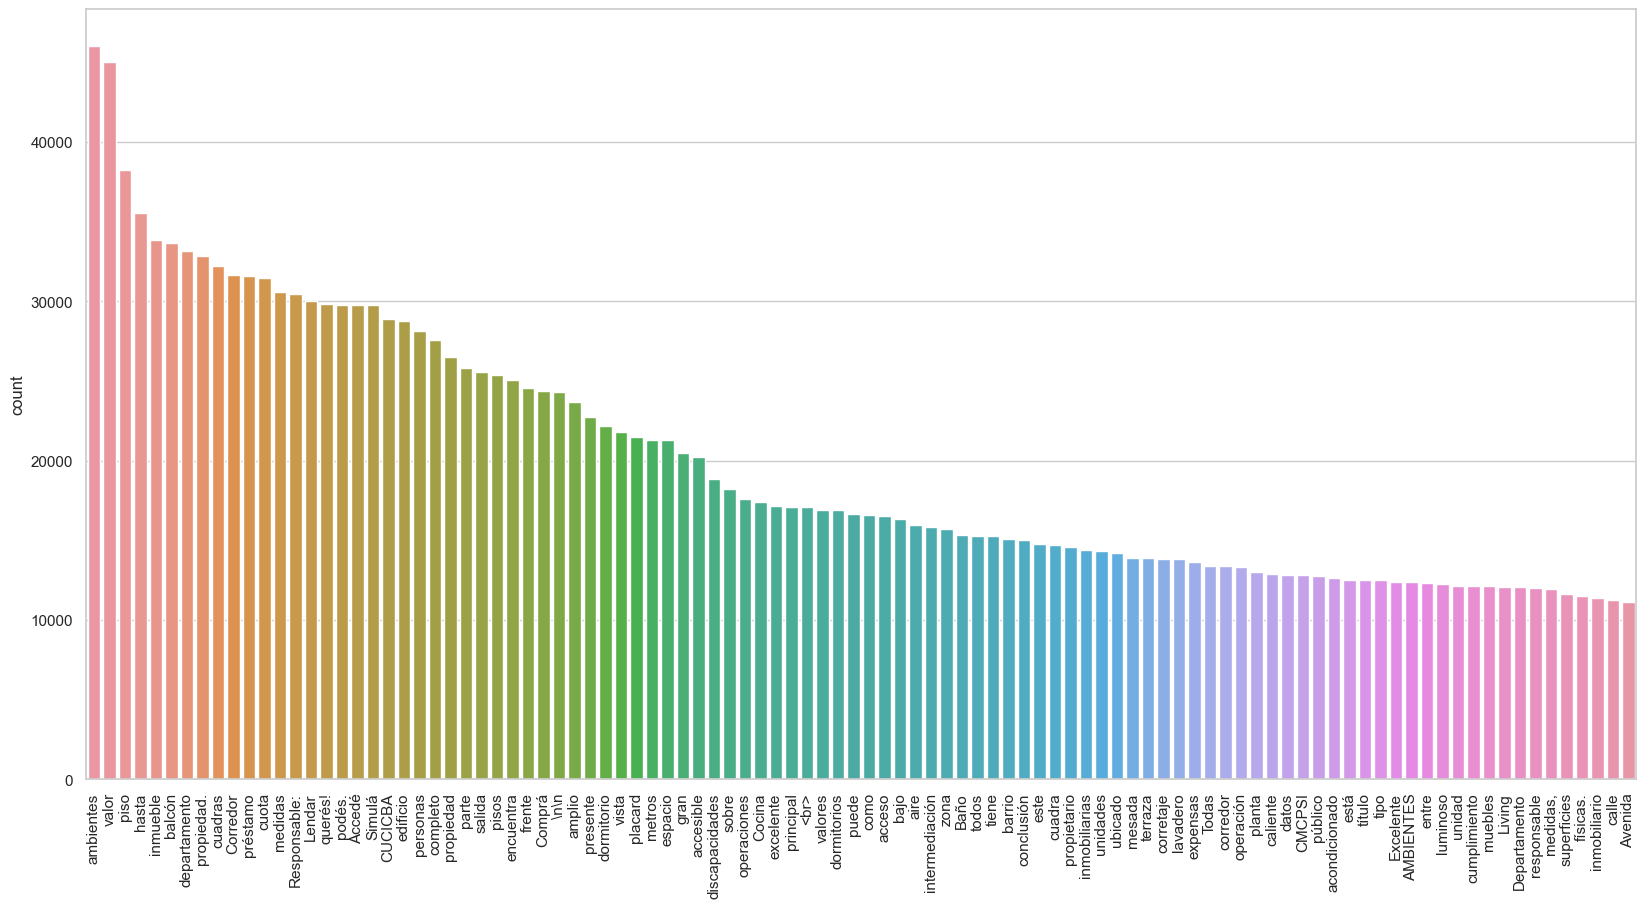

In [104]:
# count how many times every word appears in ds_descripciones['property_description']
# and save it in a dictionary


word_count = {}
palabras_ignoradas = ['para', 'baño', 'cocina', 'comedor','casa','cuenta','esta','living']
ds_descripciones.reset_index(drop=True, inplace=True)

for i in range(len(ds_descripciones['property_description'])):
    if type(ds_descripciones['property_description'][i]) == str:
        for word in ds_descripciones['property_description'][i].split():
            if len(word) < 4 or word in palabras_ignoradas:
                continue
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

# save dictionary in a dataframe

word_count_aux = word_count.copy()

for key, value in word_count_aux.items():
    if value <= 300:
        del word_count[key]

df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])
df_word_count.sort_values(by=['count'], ascending=False, inplace=True)
df_word_count



# barplot of the 20 most common words
plt.figure(figsize=(20,10))
sns.barplot(x=df_word_count.index[:100], y=df_word_count['count'][:100])
plt.xticks(rotation=90)
plt.show()


## Dataset final

In [105]:
ds_propiedades_columnas_generadas = ds_propiedades.copy()

In [161]:
ds_propiedades = ds_propiedades_columnas_generadas.copy()

In [162]:
ds_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85693 entries, 0 to 85692
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85693 non-null  object 
 1   latitud                   85693 non-null  float64
 2   longitud                  85693 non-null  float64
 3   place_l3                  85693 non-null  object 
 4   property_type             85693 non-null  object 
 5   property_rooms            85693 non-null  float64
 6   property_bedrooms         85693 non-null  float64
 7   property_surface_total    85693 non-null  float64
 8   property_surface_covered  85693 non-null  float64
 9   property_price            85693 non-null  float64
 10  property_title            85693 non-null  object 
 11  pxm2                      85693 non-null  float64
 12  tipo_precio               85693 non-null  object 
 13  property_description      85693 non-null  object 
 14  piscin

In [163]:
ds_propiedades.head()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,...,property_description,piscina,cochera,balcon,hidromasaje,gimnasio,a_estrenar,quincho,sum,expensas_tipo
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,...,Hermoso piso de 4 ambientes con dependencia y ...,0,1,1,0,0,0,0,0,no aplica
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,...,2 ambientes con balcón y vista totalmente abie...,0,1,1,0,0,0,0,0,no aplica
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,...,**DIAZ VELEZ 4291 Y PRINGLES** Almagro.<br><br...,0,0,0,0,0,0,0,0,no aplica
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,...,IMPECABLE 2 AMBIENTES A ESTRENAR!<...,0,0,1,0,0,1,0,0,medias
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,...,"Excelente piso antiguo, lindísimo por sus tech...",0,0,1,0,0,0,0,0,no aplica


hacemos unas columnas dummy para property_type, place_l3 y expensas_tipo

In [164]:
# get dummies for categorical variables

ds_propiedades = pd.get_dummies(ds_propiedades, columns=['property_type', 'place_l3', 'expensas_tipo'])

In [165]:
ds_propiedades.drop(columns=['property_description', 'property_title', 'id', 'tipo_precio', 'pxm2'], inplace=True)

In [166]:
ds_propiedades.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,piscina,cochera,balcon,...,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,expensas_tipo_altas,expensas_tipo_bajas,expensas_tipo_medias,expensas_tipo_no aplica,expensas_tipo_sin
0,-34.558855,-58.452458,4.0,3.0,160.0,146.0,460000.0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,-34.582403,-58.443841,2.0,1.0,50.0,46.0,148000.0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,-34.605825,-58.422214,3.0,2.0,47.0,47.0,89000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-34.561971,-58.455670,2.0,1.0,52.0,48.0,127000.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-34.606738,-58.389426,3.0,2.0,76.0,75.0,129900.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## 1b) Entranamiento XGBoost

In [223]:
##split train y test
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(ds_propiedades, ds_propiedades['property_price'], test_size=0.20, random_state=1)
x_train.drop(columns=['property_price'], inplace=True)
x_test.drop(columns=['property_price'], inplace=True)

In [224]:
x_train.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,piscina,cochera,balcon,hidromasaje,...,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,expensas_tipo_altas,expensas_tipo_bajas,expensas_tipo_medias,expensas_tipo_no aplica,expensas_tipo_sin
56983,-34.636220,-58.469757,2.0,1.0,43.0,39.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16719,-34.598281,-58.423501,2.0,1.0,38.0,33.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39889,-34.574388,-58.492151,4.0,3.0,73.0,73.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
64349,-34.653291,-58.524824,3.0,2.0,66.0,66.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42503,-34.611290,-58.453860,3.0,2.0,67.0,67.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Modelo inicial sin optimizar (con los hiperparametros del TP1)

En el tp1 hicimos una optimizacion de hiperparametros con StratifiedKFold pero no logramos mejoria, por lo que los hiperparametros son los default del modelo

In [226]:
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state=1)

In [227]:
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

In [228]:
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})

performance.head()

,Valor Real,Prediccion,Error
11387,170000.0,183790.640625,-13790.640625
78283,360000.0,301092.062500,58907.937500
15574,280000.0,282107.937500,-2107.937500
17122,129000.0,146419.031250,-17419.031250
8069,260000.0,266423.500000,-6423.500000


In [229]:
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")



rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")  
print(f"El error (rmse) de test relativo es: {rmse / y_test.mean() * 100}%")

El error (mse) de test es: 1473587857.3848019
El error (rmse) de test es: 38387.33980604546
El error (rmse) de test relativo es: 22.62140499622676%


In [230]:
#Coef. de Determinación R2
score_xgb_train = xgb_model.score(x_train, y_train)
score_xgb_test = xgb_model.score(x_test, y_test)
print(f"El coeficiente de Determinación R2 en train es: {score_xgb_train}")
print(f"El coeficiente de Determinación R2 en test es: {score_xgb_test}")

El coeficiente de Determinación R2 en train es: 0.9232276232123919
El coeficiente de Determinación R2 en test es: 0.89301154705351


Viendo la comparacion directa contra el mismo modelo en el TP1, podemos ver que el modelo mejoro bastante con los nuevos datos que generamos.

El error (mse) de test pasa de 1907948928.924305 -> 1473587857.3848019

El error (rmse) de test pasa de 43680.074735791204 -> 38387.33980604546  (12,1% mejor)

El R2 en train pasa de 0.8918109411819658 -> 0.9232276232123919 

El R2 en test pasa de 0.860060265420469 -> 0.89301154705351


Esto demuestra que las variables que generamos a partir de las descripciones son muy utiles para el modelo, y que el modelo mejora bastante con ellas.

### Probamos optimizar los hiperparametros

In [214]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score


xgb_cv = xgb.XGBRegressor(objective = 'reg:squarederror', random_state=2)

n=10

#xgb param grid
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 7],
    'gamma': [0.3, 0.4],
}

folds=5
kfoldcv = StratifiedKFold(n_splits=folds, random_state=10,shuffle=True)

scorer_fn = make_scorer(r2_score)

random_search_cv = RandomizedSearchCV(estimator=xgb_cv,
                              param_distributions = xgb_param_grid,
                              scoring='neg_mean_squared_error',
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=10) 

random_fit = random_search_cv.fit(x_train[['property_rooms']], y_train)

/Users/lucasalda/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [215]:
print(random_fit.best_params_)

{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3}


In [231]:
parametros = random_fit.best_params_

xgb_model = xgb.XGBRegressor(learning_rate=parametros['learning_rate'], n_estimators=parametros['n_estimators'], gamma=parametros['gamma'], max_depth = parametros['max_depth'], random_state=1)

model = xgb_model.fit(X = x_train, y = y_train) 

y_pred = model.predict(x_test)

In [232]:
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})


performance.head()

,Valor Real,Prediccion,Error
11387,170000.0,170586.296875,-586.296875
78283,360000.0,284469.843750,75530.156250
15574,280000.0,264595.593750,15404.406250
17122,129000.0,145836.109375,-16836.109375
8069,260000.0,258944.703125,1055.296875


In [233]:
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")



rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")  
print(f"El error (rmse) de test relativo es: {rmse / y_test.mean() * 100}%")

El error (mse) de test es: 1515631827.2171123
El error (rmse) de test es: 38931.11643938705
El error (rmse) de test relativo es: 22.941848963234023%


In [222]:
#Coef. de Determinación R2
score_xgb_train = xgb_model.score(x_train, y_train)
score_xgb_test = xgb_model.score(x_test, y_test)
print(f"El coeficiente de Determinación R2 en train es: {score_xgb_train}")
print(f"El coeficiente de Determinación R2 en test es: {score_xgb_test}")

El coeficiente de Determinación R2 en train es: 0.9123206582983798
El coeficiente de Determinación R2 en test es: 0.8899589843810198


La busqueda de hiperparametros encuentra una configuracion con un resultado similar al modelo inicial, pero con un tiempo de entrenamiento mucho mayor. Por esto mantenemos el modelo inicial.